## Model Comparison

### 1. ROC Curve & AUC

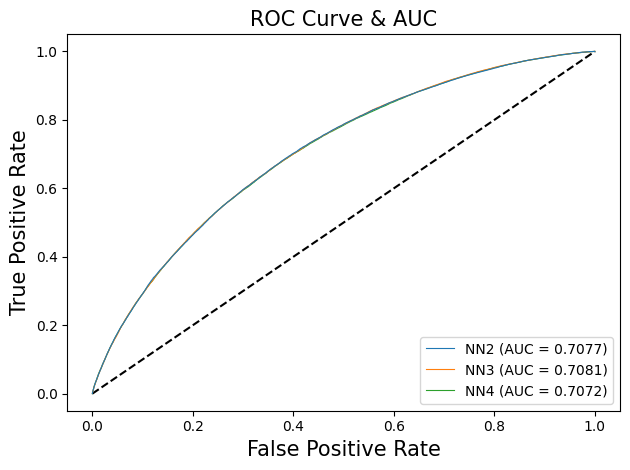

In [185]:
fpr_nn2, tpr_nn2, thresholds_nn2 = roc_curve(y_test, y_pred_prob_nn2)
fpr_nn3, tpr_nn3, thresholds_nn3 = roc_curve(y_test, y_pred_prob_nn3)
fpr_nn4, tpr_nn4, thresholds_nn4 = roc_curve(y_test, y_pred_prob_nn4)
auc_nn2 = auc(fpr_nn2, tpr_nn2)
auc_nn3 = auc(fpr_nn3, tpr_nn3)
auc_nn4 = auc(fpr_nn4, tpr_nn4)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_nn2, tpr_nn2, label='NN2 (AUC = {:.4f})'.format(auc_nn2), linewidth=0.8, zorder=3)
plt.plot(fpr_nn3, tpr_nn3, label='NN3 (AUC = {:.4f})'.format(auc_nn3), linewidth=0.8, zorder=2)
plt.plot(fpr_nn4, tpr_nn4, label='NN4 (AUC = {:.4f})'.format(auc_nn4), linewidth=0.8, zorder=1)
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC Curve & AUC', fontsize=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 2. Precision-Recall Curve

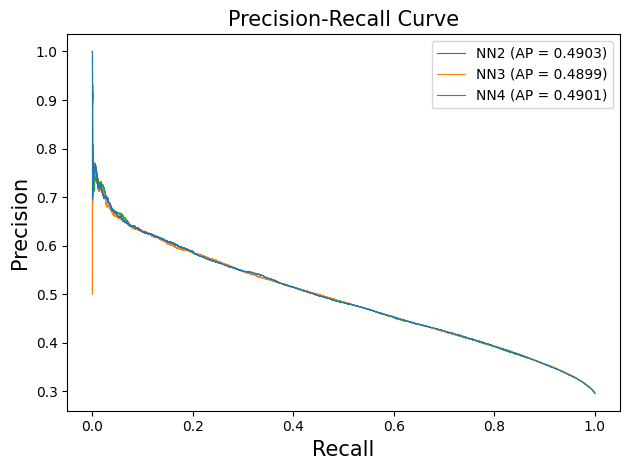

In [186]:
precision_nn2, recall_nn2, _ = precision_recall_curve(y_test, y_pred_prob_nn2)
precision_nn3, recall_nn3, _ = precision_recall_curve(y_test, y_pred_prob_nn3)
precision_nn4, recall_nn4, _ = precision_recall_curve(y_test, y_pred_prob_nn4)
ap_nn2 = average_precision_score(y_test, y_pred_prob_nn2, average='micro')
ap_nn3 = average_precision_score(y_test, y_pred_prob_nn3, average='micro')
ap_nn4 = average_precision_score(y_test, y_pred_prob_nn4, average='micro')

plt.plot(recall_nn2, precision_nn2, label='NN2 (AP = {:.4f})'.format(ap_nn2), linewidth=0.8, zorder=3)
plt.plot(recall_nn3, precision_nn3, label='NN3 (AP = {:.4f})'.format(ap_nn3), linewidth=0.8, zorder=2)
plt.plot(recall_nn4, precision_nn4, label='NN4 (AP = {:.4f})'.format(ap_nn4), linewidth=0.8, zorder=1)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve', fontsize=15)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 3. False Negative Rate Under Different Cut-off Level

In [362]:
dict_m = {'NN2':model_nn2, 'NN3': model_nn3, 'NN4': model_nn4}
list_x = [x/100 for x in range(0, 100, 1)]
fn_rate_list = []
output = pd.DataFrame()

for key, val in dict_m.items():
    y_pred_prob = val.predict(X_test)
    fn_rate_list = []
    for i in list_x:
        y_pred = np.where(y_pred_prob > i, 1, 0)[:, 0]
        confusion_matrixs = confusion_matrix(y_test,y_pred)
        fn_rate = confusion_matrixs[1,0]/(confusion_matrixs[1,0]+confusion_matrixs[1,1])
        fn_rate_list.append(fn_rate)
    fn_output = [float(k) for k in fn_rate_list]
    fn_output = pd.DataFrame(fn_output, index=list_x, columns=[key])
    output = pd.concat([output, fn_output], axis=1)

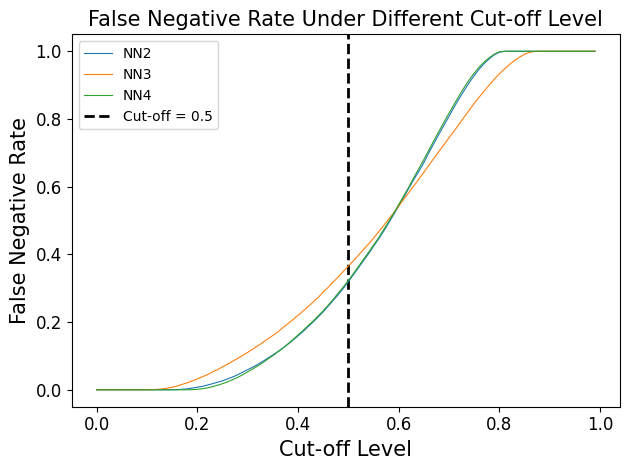

In [378]:
output.plot(linewidth=0.8, fontsize=12, zorder=3)
plt.axvline(x=0.5, color='black', linestyle='--',linewidth=2,label='Cut-off = 0.5', zorder=2)
plt.title('False Negative Rate Under Different Cut-off Level', fontsize=15)
plt.xlabel('Cut-off Level', fontsize=15)
plt.ylabel('False Negative Rate', fontsize=15)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()